In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np 
import keras.layers 
from sklearn.model_selection import train_test_split

In [41]:
#Carichiamo i dati che abbiamo compattato nel precedente notebook 
gear_df = pd.read_csv('gear_data.csv')

#estraggo i labels dal dataset
labels = gear_df[['healthy', 'broken']]

gear_df = gear_df[['a2', 'a3', 'a4', 'load']]

Bisogna provare a cambiare la maniera in cui viene costruito il ***training Set***. Per capire se le labels non corrispondono esattamente. In questo momento la rete non è in grado di riuscire a comprendere nulla, anzi, dà come risultato 0,5 ad ogni elemento passato. 

In [42]:

train_data, validation_data, train_labels, validation_labels = train_test_split(
    gear_df, labels, test_size=0.2, random_state=10 
)

print(train_data.head())
print(labels.head())

              a2        a3       a4  load
1142803 -6.82814  1.453030 -4.24637    10
1717632 -6.90972  2.484160  7.78738    70
349561   3.15663  0.328889 -3.70772    30
481974  -1.54654  2.810590 -2.66591    40
1401100 -6.08126  3.830040 -8.08889    30
   healthy  broken
0        1       0
1        1       0
2        1       0
3        1       0
4        1       0


In [43]:
from keras import Sequential
model = Sequential()
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

#inutile così
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
model2.compile(loss='mse', optimizer='adam', metrics = ['mae'])


In [44]:
history = model2.fit(train_data, train_labels, batch_size=32, epochs= 5, validation_data= (validation_data, validation_labels))

Epoch 1/5
50528/50528 [==============================] - 128s 3ms/step - loss: 0.2692 - mae: 0.5048 - val_loss: 0.2500 - val_mae: 0.5000
Epoch 2/5
 2192/50528 [>.............................] - ETA: 1:52 - loss: 0.2500 - mae: 0.5000

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


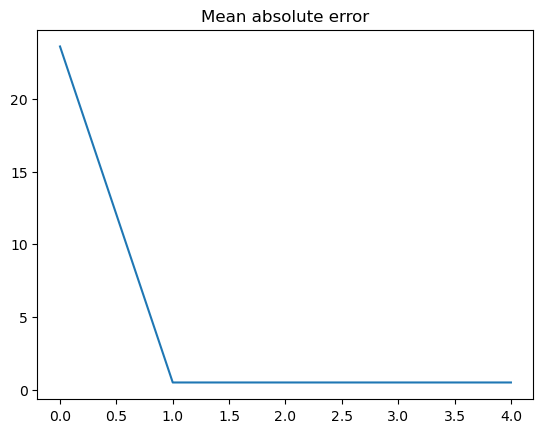

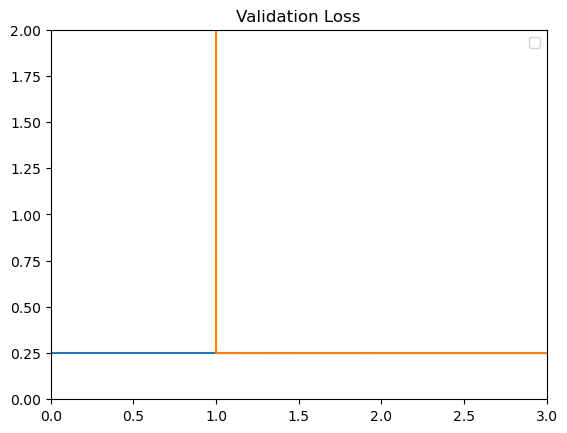

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Mean absolute error")
plt.plot(history.history['mae'])


plt.figure()
plt.xlim(0, 3)
plt.ylim(0,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend()
plt.title('Validation Loss')
plt.show()

In [ ]:
model2.predict(validation_data[:20])

1/1 [==============================] - 0s 76ms/step


array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)